In [237]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [245]:
bill_df = pd.read_csv('billionaires.csv')

In [288]:
bill_df.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [246]:
bill_df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


- name : 억만장자 이름
- rank : 억만장자 순위
- year : 데이터 수집된 연도
- company.founded : 회사 설립 연도
- company.name : 회사 이름
- company.relationship : 회사와 관계
- company.sector : 비즈니스 분야
- company.type : 회사 타입. 새로 설립된 회사인지 물려받은 건지..
- demographics.age : 억만장자 현재 나이
- demographics.gender : 억만장자 성별
- location.citizenship : 억만장자가 어느 지역 시민인지 ex) 뉴욕
- location.country code : 나라 코드
- location.gdp : gdp (부정확한 것 같습니다.)
- location.region : 억만장자가 살고 있는 지역 이름 ex) 북아메리카
- wealth.type : 억만장자 타입
- wealth.worth : 억만장자가 지니고 있는 재산 정도
- wealth.how.category : 억만장자의 돈이 어떤 카테고리에서 들어왔는지
- wealth.how.from : 억만장자의 돈이 어떻게 들어왔는지
- wealth.how.industry : 억만장자가 수입을 낸 산업
- wealth.how.inherited : 누구로부터 물려받은 부인지
- wealth.how.was founder : 억만장자가 그 기업의 창업자인지 아닌지
- wealth.how. was political : 억만장자의 돈이 정치적으로 온 것인지 (부정확한 것 같습니다.)

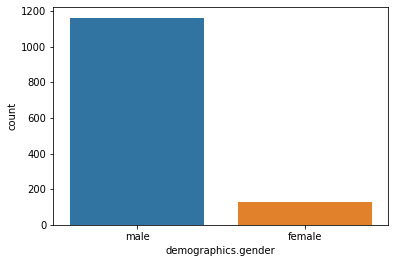

In [247]:
#성별마다

sns.countplot(bill_df['demographics.gender'][::2], data = bill_df)

In [248]:
bill_1996 = bill_df[bill_df['year']==1996]
bill_2001 = bill_df[bill_df['year']==2001]
bill_2014 = bill_df[bill_df['year']==2014]

In [249]:
bill_2014.groupby('company.sector').count().iloc[:,0]

company.sector
  Oil refining         3
 Communications        1
 Finance               2
 Oil refining          1
 Software              1
                      ..
wine and spirits       1
winter jackets         1
wireless products      1
wrestling promotion    1
yogurt                 1
Name: name, Length: 459, dtype: int64

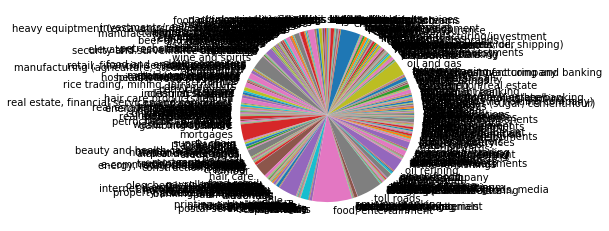

In [250]:
plt.pie(bill_2014.groupby('company.sector').count().iloc[:,0], labels=bill_2014['company.sector'].unique())
plt.show()

In [251]:
plt.figure(figsize=(10,50))
plt.plot(bill_2014.groupby('company.sector').count().iloc[:,0], bill_2014['company.sector'].unique())
plt.xticks(rotation=45)
plt.show()

KeyboardInterrupt: 

In [252]:
top5 = bill_2014.groupby('company.sector').count().iloc[:,0]
top5 = top5.sort_values(ascending=False)

others = top5[5:]
top5 = top5[:5]
top5["others"]=others.sum()

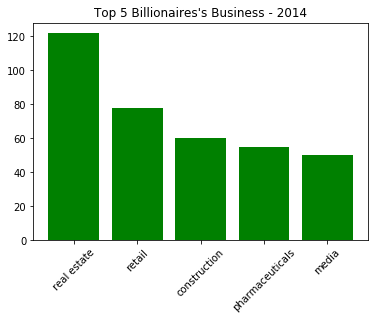

In [253]:
plt.bar(top5[:5].index, top5[:5], color='green')
plt.title("Top 5 Billionaires's Business - 2014")
plt.xticks(rotation=45)
plt.show()

In [254]:
top5_2014 = bill_2014.groupby('company.sector').count().iloc[:,0]
top5_2014 = top5_2014.sort_values(ascending=False)

others = top5_2014[5:]
top5_2014 = top5_2014[:5]
top5_2014["others"]=others.sum()

top5_1996 = bill_1996.groupby('company.sector').count().iloc[:,0]
top5_1996 = top5_1996.sort_values(ascending=False)

others = top5_1996[5:]
top5_1996 = top5_1996[:5]
top5_1996["others"]=others.sum()

top5_2001 = bill_2001.groupby('company.sector').count().iloc[:,0]
top5_2001 = top5_2001.sort_values(ascending=False)

others = top5_2001[5:]
top5_2001 = top5_2001[:5]
top5_2001["others"]=others.sum()

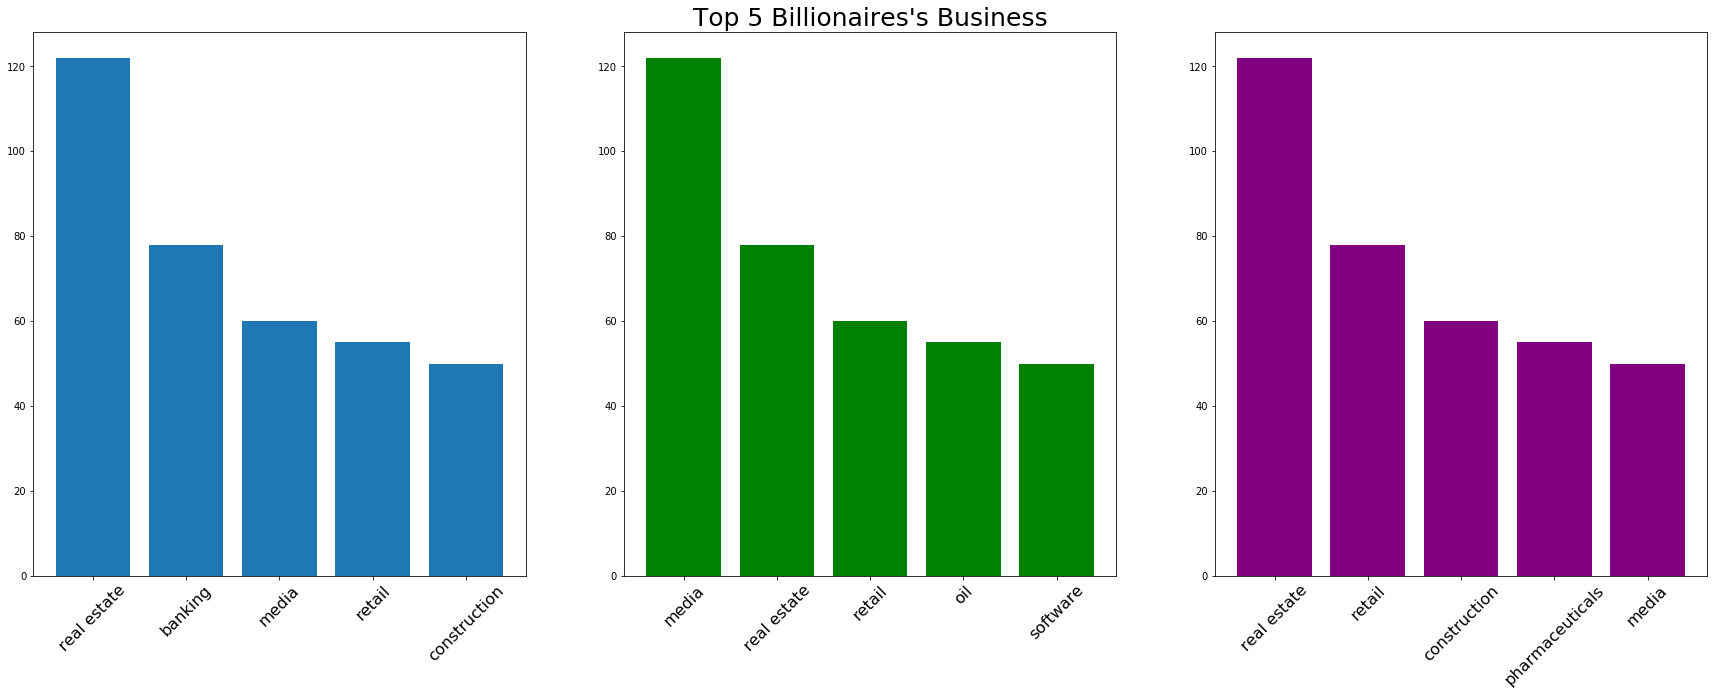

In [255]:
plt.figure(figsize=(30,10))


plt.subplot(131)
plt.bar(top5_1996[:5].index, top5[:5])

plt.xticks(fontsize=16, rotation=45)


plt.subplot(132)
plt.bar(top5_2001[:5].index, top5[:5], color='green')

plt.xticks(fontsize=16, rotation=45)
plt.title("Top 5 Billionaires's Business", fontsize=25)


plt.subplot(133)
plt.bar(top5_2014[:5].index, top5[:5], color='purple')

plt.xticks(fontsize=16, rotation=45)



plt.show()

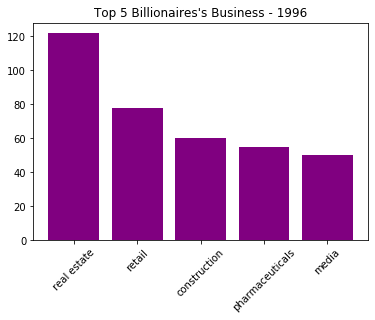

In [256]:
plt.bar(top5[:5].index, top5[:5], color='purple')
plt.title("Top 5 Billionaires's Business - 1996")
plt.xticks(rotation=45)
plt.show()

In [257]:
top5 = bill_2001.groupby('company.sector').count().iloc[:,0]
top5 = top5.sort_values(ascending=False)

others = top5[5:]
top5 = top5[:5]
top5["others"]=others.sum()

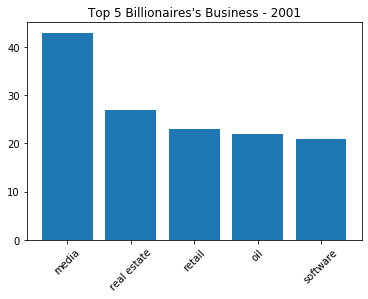

In [258]:
plt.bar(top5[:5].index, top5[:5])
plt.title("Top 5 Billionaires's Business - 2001")
plt.xticks(rotation=45)
plt.show()

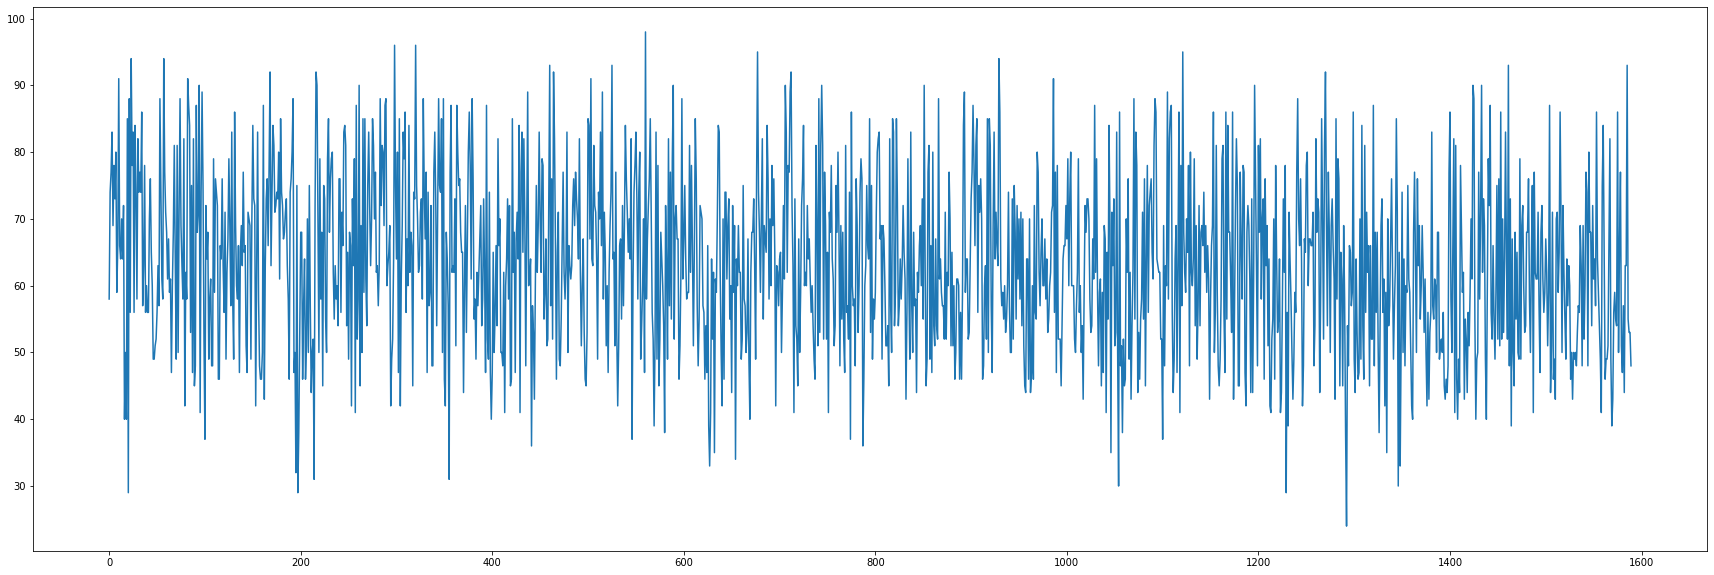

In [259]:
plt.figure(figsize=(30,10))
age_cleansing = bill_2014[bill_2014['demographics.age']!=0]

plt.plot([i for i in range(len(age_cleansing))],age_cleansing['demographics.age'])

In [260]:
bill_2014['demographics.age'].mean()

60.92800967937084

In [261]:
age_cleansing['Age_cut'] = pd.cut(age_cleansing['demographics.age'], bins=[20,30,40,50,60,70,80,90,100], 
                                  labels=['20-30','30-40','40-50','50-60', '60-70','70-80','80-90','90-100'])

C:\Users\khak1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [262]:
age_cleansing

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political,Age_cut
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True,50-60
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True,70-80
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True,70-80
11,Warren Buffett,4,2014,1839,Berkshire Hathaway,founder,Finance,aquired,83,male,...,North America,founder non-finance,58.2,Traded Sectors,True,Consumer,not inherited,True,True,80-90
14,Larry Ellison,5,2014,1977,Oracle,founder,software,new,69,male,...,North America,founder non-finance,48.0,New Sectors,True,Technology-Computer,not inherited,True,True,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,"William Moncrief, Jr.",1565,2014,1929,Moncrief Oil,relation,oil,new,93,male,...,North America,inherited,1.0,Resource Related,True,Energy,father,True,True,90-100
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True,50-60
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True,50-60
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True,50-60


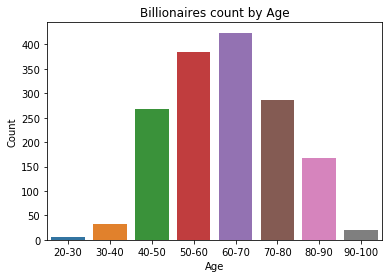

In [263]:
sns.countplot(age_cleansing['Age_cut'])

plt.title("Billionaires count by Age")

plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

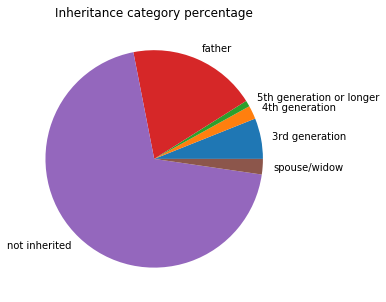

In [300]:
#재산을 inherited한 경우, 대부분의 경우 아버지로부터 물려받았을 것이다.

i_list = bill_2014.groupby('wealth.how.inherited').count().iloc[:,0].values

i_ratio = []

for i in i_list:
    i_ratio.append(i/max(bill_2014.count()))
    
plt.figure(figsize=(5,5))

plt.pie(i_ratio,labels=['3rd generation','4th generation','5th generation or longer','father','not inherited','spouse/widow'])
plt.title('Inheritance category percentage')

plt.show()

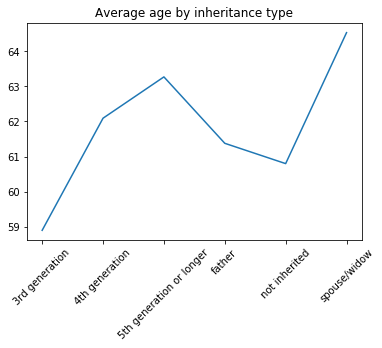

In [314]:
plt.plot(['3rd generation','4th generation','5th generation or longer','father','not inherited','spouse/widow'],bill_2014.groupby('wealth.how.inherited').mean()['demographics.age'])
plt.xticks(rotation=45)

plt.title('Average age by inheritance type')

plt.show()

In [313]:
bill_2014.groupby('wealth.how.inherited').mean()['demographics.age']

wealth.how.inherited
3rd generation              58.900000
4th generation              62.090909
5th generation or longer    63.266667
father                      61.376582
not inherited               60.798436
spouse/widow                64.526316
Name: demographics.age, dtype: float64